In [41]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from StringIO import StringIO
from pymining import seqmining 
import re
import numpy as np
sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (8.5, 6)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

# Explore which projects are interesting

In [12]:
cloud_plats_metrics=pd.read_csv('./experiments/cloud_plats_metrics.csv',
                                sep=';', dtype=object, index_col=None)
for x,stri in enumerate(cloud_plats_metrics):
    if x>0 and x!=3:
        cloud_plats_metrics[stri]= cloud_plats_metrics[stri].apply(int)

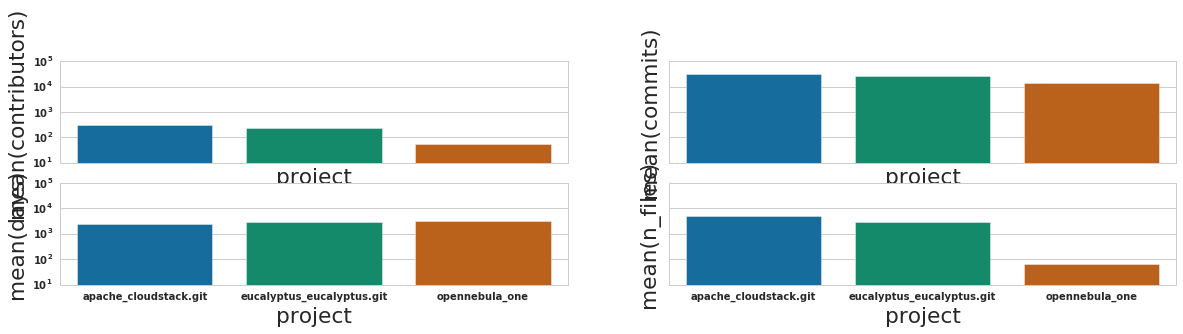

In [498]:
FIG_SIZE = (20, 4)
figure, axes = plt.subplots(2, 2, sharex=True, sharey=True)
figure.set_size_inches(FIG_SIZE)
p=0
n=0
for x,stri in enumerate(cloud_plats_metrics):
    if x>0 and x!=3:            
        ax=sns.barplot(
            y=stri,
            x='project',
            data=cloud_plats_metrics.reset_index(),
            ax=axes[n][p]
        )
        p+=1
        if p==2:
            p=0
            n=1
ax.set_yscale('log')

# Explore commits details

In [43]:
apache_cloudstack=pd.read_csv('./experiments/apache_cloudstack_commits.git.csv',
                                sep=';', dtype=object, index_col=None, parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
eucalyptus_eucalyptus=pd.read_csv('./experiments/eucalyptus_eucalyptus_commits.git.csv',
                                sep=';', dtype=object, index_col=None, parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
#opennebula_one=pd.read_csv('./experiments/opennebula_one.csv',
#                                sep=';', dtype=object, index_col=None, parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(apache_cloudstack):
    if x>1 :
        apache_cloudstack[stri]= apache_cloudstack[stri].apply(int)
        eucalyptus_eucalyptus[stri]= eucalyptus_eucalyptus[stri].apply(int)
        #opennebula_one[stri]= opennebula_one[stri].apply(int)
cloud_plats=[('apache_cloudstack',apache_cloudstack),('eucalyptus_eucalyptus',eucalyptus_eucalyptus)]
for i, (name, df) in enumerate(cloud_plats):
    df['date']=df['date'].apply(lambda x: pd.to_datetime(x))
    df=df.sort('date')
    

C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


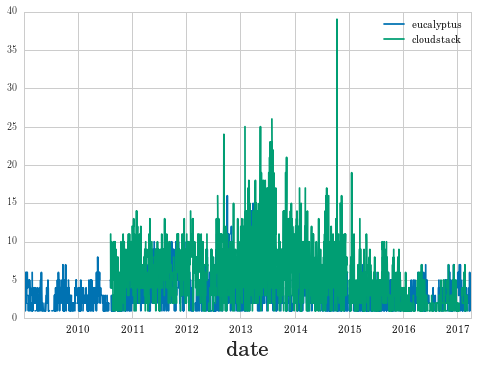

In [44]:
ax=eucalyptus_eucalyptus.set_index('date').resample('1D').plot(y='developers_diff', label='eucalyptus')
apache_cloudstack.set_index('date').resample('1D').plot(y='developers_diff',label='cloudstack',ax=ax)

In [18]:
apache_cloudstack.developers_diff.describe()

count    1897.000000
mean        6.085925
std         4.118818
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        39.000000
Name: developers_diff, dtype: float64

In [21]:
apache_cloudstack.sort_values('developers_diff', ascending=False).head()

,commit,date,commits,added,deleted,modified,added_java,deleted_java,modified_java,developers_diff,developers,all_files,java_files
1285,a75a43137316a60b20760aa5015d97f55520fd16,2014-10-13,11,145,31,1318,71,6,963,39,335,7973,5878
916,1edaa36cc68e845a42339d5f267d49c82343aefb,2013-08-01,55,924,1574,1195,382,86,965,26,229,7051,5223
747,4709756bd597c56d47e8ca86ea3216a7e960b2cd,2013-02-01,25,171,718,517,101,138,337,25,160,6005,4193
844,a10861a57b1a0df11c80dbd04bd02cc2772de2f4,2013-05-16,33,796,341,1998,674,318,1640,25,196,7547,4910
623,d2155890cc87af636c69681a559d72793365740c,2012-09-12,15,0,0,11,0,0,10,24,122,5909,3472


C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


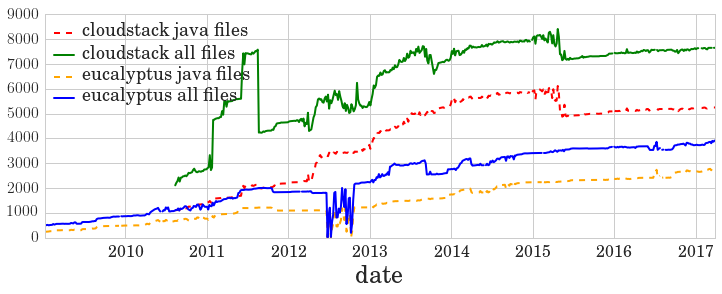

In [73]:
cloudstack=apache_cloudstack.set_index('date')
cloudstack=cloudstack.resample('5D')
eucalyptus=eucalyptus_eucalyptus.set_index('date')
eucalyptus=eucalyptus.resample('5D')

ax=cloudstack.plot( y='java_files', linewidth=2,linestyle='--', color='red', label='cloudstack java files')
ax=cloudstack.plot( y='all_files', linewidth=2,ax=ax, color='green', label='cloudstack all files')
ax=eucalyptus.plot( y='java_files', linewidth=2,linestyle='--',ax=ax, color='orange', label='eucalyptus java files')
ax=eucalyptus.plot( y='all_files', linewidth=2,ax=ax, color='blue', label='eucalyptus all files')
legend = ax.legend(loc='upper left', shadow=True)
for label in legend.get_texts():
    label.set_fontsize(18)
ax.figure.set_size_inches(12,4)
ax.tick_params(labelsize=16, width=4)
ax.figure.savefig('./experiments/figures/growth_cloud.pdf', bbox_inches='tight', facecolor='white')


C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


{'polynomial': [1.1180593328621074e-06, -0.0011460369710772978, 0.34344976120414783, -16.561932654060104, 1558.3852049521306], 'determination': 0.97776617827670753}


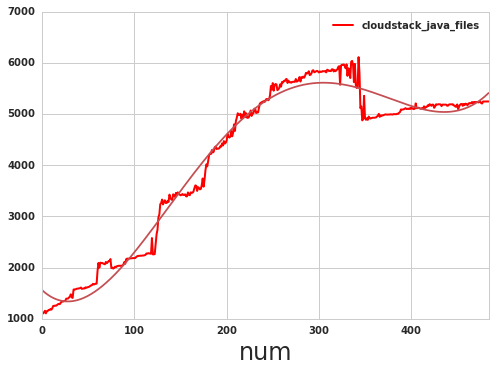

In [585]:
df=cloudstack.reset_index().dropna()
df=df.sort_values('date', ascending=True)
df['num']=df.index
ax=df.plot( x='num', y='java_files', linewidth=2, color='red', label='cloudstack_java_files')
z = np.polyfit(df.num, df.java_files, 4)
p = np.poly1d(z)
plt.plot(df.num,p(df.num),'r-')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df.num, df.java_files)
#print('y=%.6fx+(%.6f)'%(z[0],z[1]))
#print('R',r_value)
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results
print(polyfit(df.num, df.java_files, 4))

In [462]:
cloudstack=apache_cloudstack.set_index('date')
cloudstack['per_java']=cloudstack['java_files']/cloudstack['all_files']


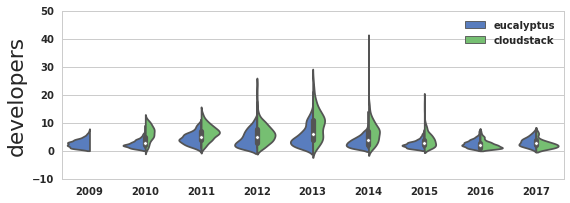

In [198]:
eucalyptus_eucalyptus['project']='eucalyptus'
apache_cloudstack['project']='cloudstack'
grow_cloud = pd.concat([eucalyptus_eucalyptus, apache_cloudstack])


grow_cloud['date']= grow_cloud['date'].apply(lambda x: str(x).split('-')[0])
ax = sns.violinplot(x="date", y="developers_diff", hue="project",data=grow_cloud, palette="muted", split=True)
ax.legend()
ax.set_ylabel('developers')
ax.set_xlabel('')

ax.figure.set_size_inches(9,3)
ax.figure.savefig('./experiments/figures/developers_grow.pdf', bbox_inches='tight', facecolor='white')

C:\Users\Ahmed\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


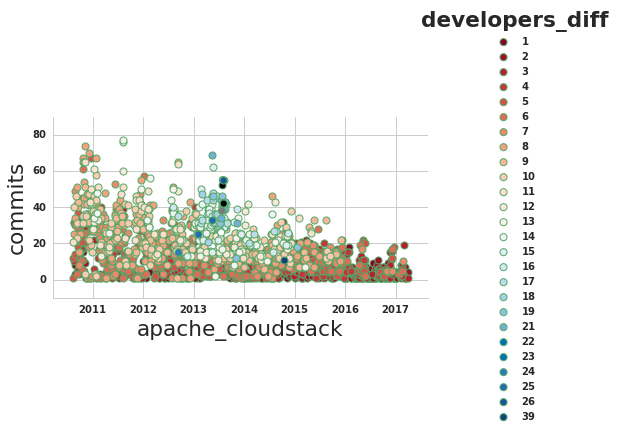

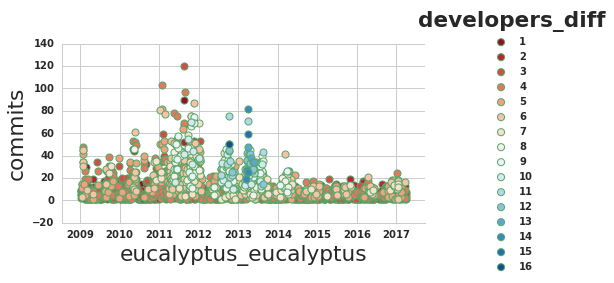

In [10]:
kws = dict(s=50, linewidth=1, edgecolor="g")
for i, (name, df) in enumerate(cloud_plats):
    ax = sns.FacetGrid(df, hue="developers_diff", palette="RdBu", size=7)
    ax = (ax.map(plt.scatter, "date", "commits", **kws ).add_legend())
    
    ax.set_xlabels(name)
    ax.fig.set_size_inches(9,3)


C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


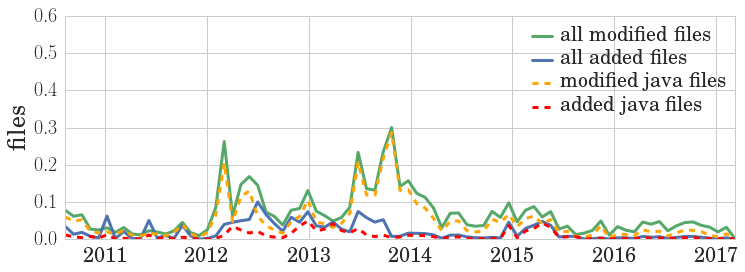

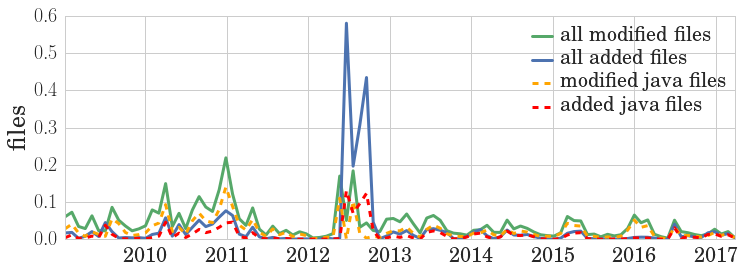

In [75]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True



for i, (name,df) in enumerate(cloud_plats):
    df2= pd.DataFrame()
    df3= pd.DataFrame()
    df2['date']=df['date']
    df3['date']=df['date']
    name=name.split('_')[1]
    
    #df3['deleted java files_'+name]=df['deleted_java'].cumsum()
    df3['modified java files']=df['modified_java']/df['all_files']
    df3['added java files']=df['added_java']/df['all_files']
    
    #df2['all deleted files']=df['deleted']
    df2['all modified files']=df['modified']/df['all_files']
    df2['all added files']=df['added']/df['all_files']
    
    #df2['all commits']=df['commits'].cumsum()
    
    df2.set_index('date', inplace=True)
    df2=df2.resample('30D')
    df3.set_index('date', inplace=True)
    df3=df3.resample('30D')
    #if i==0:
        #ax=df3.plot(linewidth=3, alpha=2, linestyle='--', colors=['black','green','orange'])
    ax=df2.plot(linewidth=3, alpha=2, colors=['g','b', 'yellow'])
    #else:
        #ax=df3.plot(linewidth=3, alpha=2 , colors=['red','blue','purple'], ax=ax)
    #   ax=df2.plot(linewidth=3, alpha=2, colors=['g','b', 'yellow'],ax=ax)
    ax=df3.plot(linewidth=3, alpha=2, linestyle='--', colors=['orange','red','black'], ax=ax)
    ax.set_ylabel('files %')
    legend = ax.legend(loc='upper right', shadow=True)
    for label in legend.get_texts():
        label.set_fontsize(20)
    ax.figure.set_size_inches(12,4)
    import matplotlib.ticker as mtick
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
    #plt.tick_params(axis='both', which='major', labelsize=12)

    if ('cloudstack' in name):
        ax.set_xlabel('')
        ax.set_ylim(0,0.6)
        ax.tick_params(labelsize=20, width=4)

    else:
        ax.set_xlabel('')
        ax.set_ylim(0,0.6)
        ax.tick_params(labelsize=20, width=4)
    ax.figure.savefig('./experiments/figures/'+name+'.pdf', bbox_inches='tight', facecolor='white')



# Explore issues details

all issues:

In [52]:
issues_cloudstack=pd.read_csv('./experiments/issues_cloudstack.csv', sep=';', index_col=None, parse_dates=['created','updated'], 
                              infer_datetime_format="%Y-%m-%d")
issues_eucalpytus=pd.read_csv('./experiments/issues_eucalyptus.csv', sep=';', index_col=None, parse_dates=['created','updated'], 
                              infer_datetime_format="%Y-%m-%d")
issues_eucalpytus['days']=issues_eucalpytus.updated -issues_eucalpytus.created
issues_cloudstack['days']=issues_cloudstack.updated -issues_cloudstack.created
issues_cloudstack['days']=issues_cloudstack['days'].apply(lambda x: re.sub('\ days','',str(x)))
issues_eucalpytus['days']=issues_eucalpytus['days'].apply(lambda x: re.sub('\ days','',str(x)))
issues_eucalpytus['days']=issues_eucalpytus['days'].apply(lambda x: int(re.sub('\ 00:00:00','',str(x))))
issues_cloudstack['days']=issues_cloudstack['days'].apply(lambda x: int(re.sub('\ 00:00:00','',str(x))))
cloud_plats_issues=[('cloudstack',issues_cloudstack),('eucalyptus',issues_eucalpytus)]


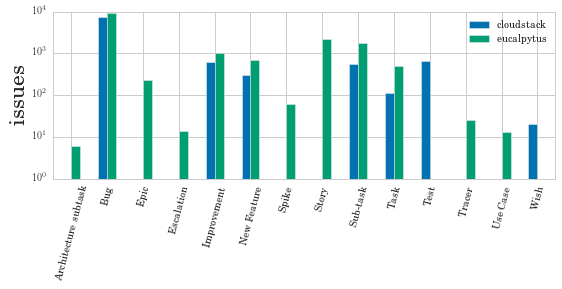

In [53]:
type_cloud1=issues_cloudstack.groupby('type').count()
type_cloud1.rename(columns={'key':'cloudstack'}, inplace=True)
type_cloud2=issues_eucalpytus.groupby('type').count()
type_cloud2.rename(columns={'key':'eucalpytus'}, inplace=True)
type_cloud = pd.concat([type_cloud1, type_cloud2], axis=1)
type_cloud=type_cloud.drop(['priority','status','resolution','created','updated','watches','days'], axis=1)
ax=type_cloud.plot(kind='bar')
plt.xticks(rotation='75')
ax.figure.set_size_inches(9,3)
ax.set_yscale('log')
ax.set_ylabel('issues')
ax.figure.savefig('./experiments/figures/type_issues.pdf', bbox_inches='tight', facecolor='white')


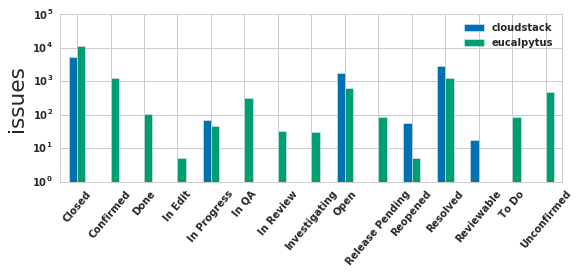

In [508]:
type_cloud1=issues_cloudstack.groupby('status').count()
type_cloud1.rename(columns={'key':'cloudstack'}, inplace=True)
type_cloud2=issues_eucalpytus.groupby('status').count()
type_cloud2.rename(columns={'key':'eucalpytus'}, inplace=True)
type_cloud = pd.concat([type_cloud1, type_cloud2], axis=1)
type_cloud=type_cloud.drop(['priority','type','resolution','created','updated','watches','days'], axis=1)
ax=type_cloud.plot(kind='bar')
plt.xticks(rotation='50')
ax.figure.set_size_inches(9,3)
ax.set_yscale('log')
ax.set_ylabel('issues')
ax.figure.savefig('./experiments/figures/status_issues.pdf', bbox_inches='tight', facecolor='white')


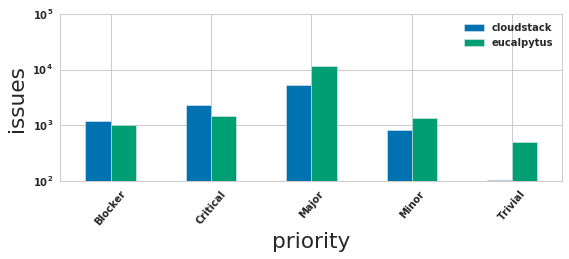

In [582]:
type_cloud1=issues_cloudstack.groupby('priority').count()
type_cloud1.rename(columns={'key':'cloudstack'}, inplace=True)
type_cloud2=issues_eucalpytus.groupby('priority').count()
type_cloud2.rename(columns={'key':'eucalpytus'}, inplace=True)
type_cloud = pd.concat([type_cloud1, type_cloud2], axis=1)
type_cloud=type_cloud.drop(['type','status','resolution','created','updated','watches','days'], axis=1)
ax=type_cloud.plot(kind='bar')
plt.xticks(rotation='50')
ax.figure.set_size_inches(9,3)
ax.set_yscale('log')
ax.set_ylabel('issues')
ax.figure.savefig('./experiments/figures/priority_issues.pdf', bbox_inches='tight', facecolor='white')

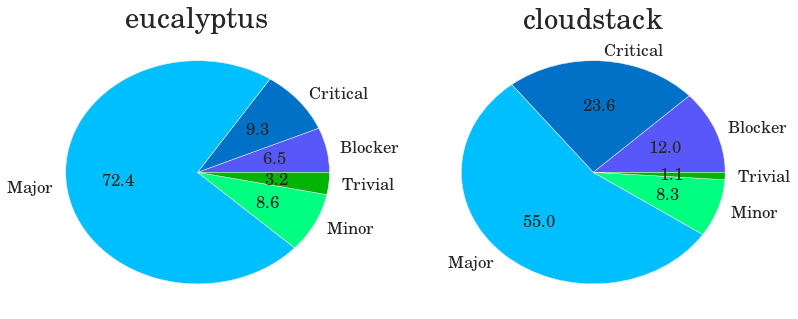

In [79]:
colors = ['#5858FA', '#0071C6','#00BFFF', '#00FF80', '#04B404' ]
#explode = (0.1, 0.05, 0.01, 0.1, 0.2)
figure, axes = plt.subplots(1, 2, sharex=True, sharey=True)
plt.rcParams.update({'font.size': 20})
ax=issues_cloudstack.groupby('priority').count().plot(kind='pie',autopct='%1.1f%%', 
                                                                           y='key',title='cloudstack', 
                                                                           ax=axes[1],  label='',colors=colors, fontsize=17)#, explode=explode)
plt.ylabel('')

ax=issues_eucalpytus.groupby('priority').count().plot(kind='pie',autopct='%1.1f%%',
                                                       y='key', title='eucalyptus', ax=axes[0],
                                                       label='', colors=colors, fontsize=17)#, explode=explode)
plt.legend('')
plt.ylabel('')
axes[0].legend('')
plt.tick_params(labelsize=30, width=4)
for label in legend.get_texts():
    label.set_fontsize(20)
figure.set_size_inches(13,5)
figure.savefig('./experiments/figures/pie_priority.pdf', bbox_inches='tight', facecolor='white')


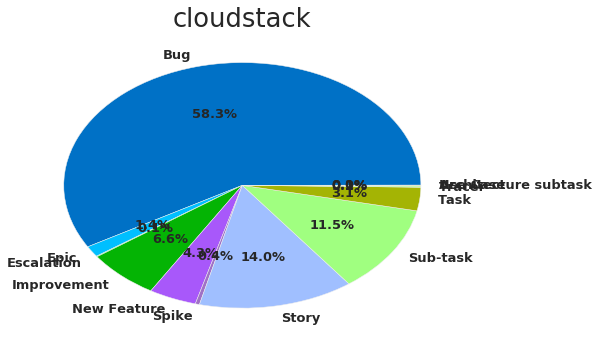

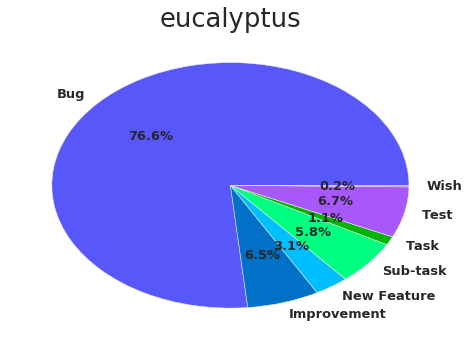

In [713]:
colors = ['#5858FA', '#0071C6','#00BFFF', '#00FF80', '#04B404', '#A858FA', '#A071C6','#A0BFFF', '#A0FF80', '#A4B404', '#AAFF80', '#AAB404'  ]
#figure, axes = plt.subplots(1, 2, sharex=True, sharey=True)
dff=issues_eucalpytus.groupby('type').count()
ax=dff.plot(kind='pie', autopct='%1.1f%%', y='key',title='cloudstack', label='',colors=colors, fontsize=13)
plt.ylabel('')
plt.legend('')
dff=issues_cloudstack.groupby('type').count()
ax=dff.plot(kind='pie',autopct='%1.1f%%', y='key', title='eucalyptus',  label='', colors=colors, fontsize=13)
plt.legend('')
plt.ylabel('')

figure.set_size_inches(13,5)

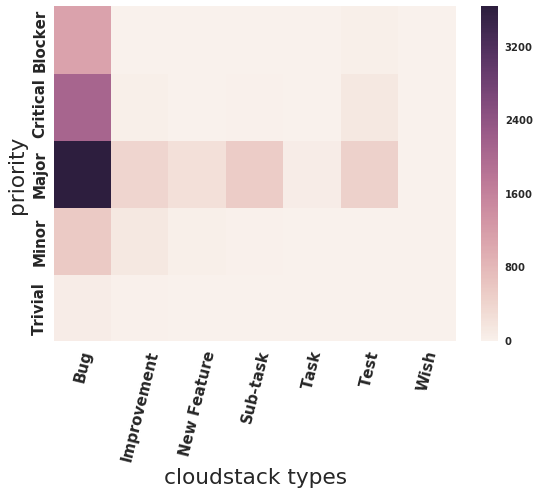

In [866]:

dff=issues_cloudstack.groupby(['type','priority']).count()
dff2= pd.DataFrame(columns=['type','priority','number'])
for i,row in enumerate(dff.index):
    tmp=pd.DataFrame([[row[0],row[1],dff.get_value(row,'key', takeable=False)]],columns=['type','priority','number'])
    dff2=dff2.append(tmp)
dff2=dff2.pivot('priority','type','number')
dff2=dff2.fillna(0)
ax1 = sns.heatmap(dff2,annot=True)
ax1.figure.set_size_inches(9,6)
ax1.set_xlabel('cloudstack types')
plt.xticks(rotation='76')
plt.tick_params(axis='both', which='major', labelsize=15)

ax1.figure.savefig('./experiments/figures/heatmap_2.pdf', bbox_inches='tight', facecolor='white')


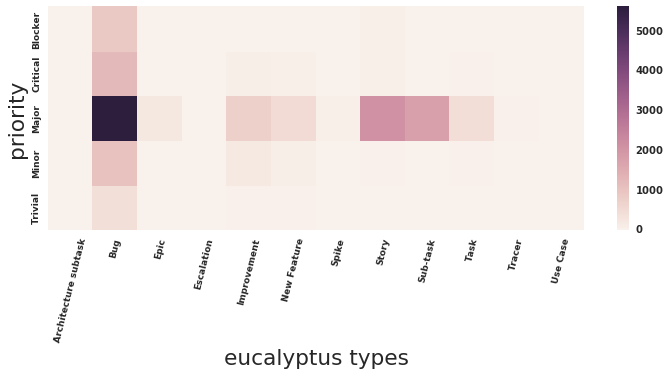

In [894]:
dff=issues_eucalpytus.groupby(['type','priority']).count()
dff2= pd.DataFrame(columns=['type','priority','number'])
for i,row in enumerate(dff.index):
    tmp=pd.DataFrame([[row[0],row[1],dff.get_value(row,'key', takeable=False)]],columns=['type','priority','number'])
    dff2=dff2.append(tmp)
dff2=dff2.pivot('priority','type','number')
dff2=dff2.fillna(0)
ax = sns.heatmap(dff2)
ax.figure.set_size_inches(12,4)
ax.set_xlabel('eucalyptus types')
plt.xticks(rotation='76')
plt.tick_params(axis='both', which='major', labelsize=9)
ax.figure.savefig('./experiments/figures/heatmap_1.pdf', bbox_inches='tight', facecolor='white')

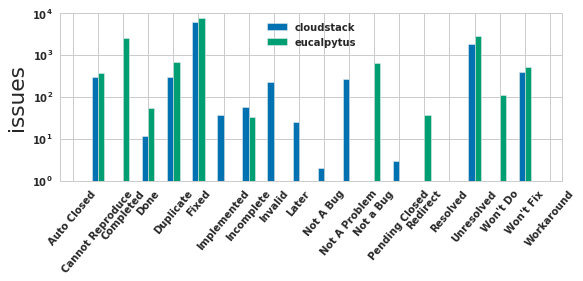

In [510]:
type_cloud1=issues_cloudstack.groupby('resolution').count()
type_cloud1.rename(columns={'key':'cloudstack'}, inplace=True)
type_cloud2=issues_eucalpytus.groupby('resolution').count()
type_cloud2.rename(columns={'key':'eucalpytus'}, inplace=True)
type_cloud = pd.concat([type_cloud1, type_cloud2], axis=1)
type_cloud=type_cloud.drop(['priority','status','type','created','updated','watches','days'], axis=1)
ax=type_cloud.plot(kind='bar')
plt.xticks(rotation='50')
ax.figure.set_size_inches(9,3)
ax.set_yscale('log')
ax.set_ylabel('issues')
ax.figure.savefig('./experiments/figures/resolution_issues.pdf', bbox_inches='tight', facecolor='white')

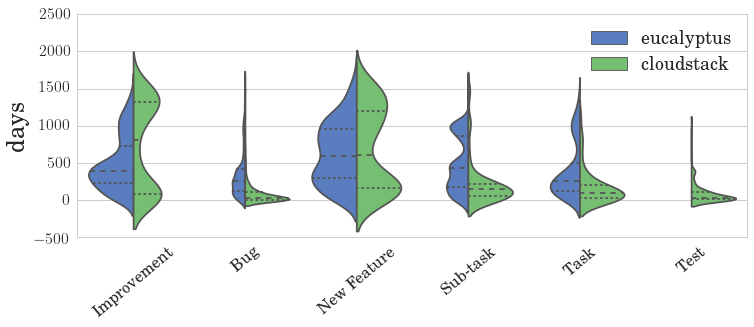

In [87]:
issues_cloudstack['project']='cloudstack'
issues_eucalpytus['project']='eucalyptus'
df=pd.concat([issues_eucalpytus,issues_cloudstack])
df=df.query('type != "Spike" and type != "Tracer" and type != "Story" and type != "Epic"')
df=df.query('type != "Architecture subtask" and type != "Use Case" and type != "Escalation" and type != "Wish"')
df=df.query('status=="Closed"')
ax1 = sns.violinplot(y="days", x="type", hue="project",data=df, palette="muted", split=True,  inner="quartile")
ax1.legend()
plt.xticks(rotation='40')
plt.ylabel('days')
plt.xlabel('')
for label in legend.get_texts():
    label.set_fontsize(18)
ax1.figure.set_size_inches(12, 4) 
plt.tick_params(axis='both', which='major', labelsize=16, width=4)
plt.legend(loc=1, prop={'size': 18})

ax1.figure.savefig('./experiments/figures/days_issues_type.pdf', bbox_inches='tight', facecolor='white')




In [550]:
for type in df.type.unique():
    cloud=df.query('project =="cloudstack" and type=="'+type+'"').dropna()
    euca=df.query('project =="eucalyptus" and type=="'+type+'"').dropna()
    print(type,scipy.stats.ks_2samp(euca.days,cloud.days))
    print(type,scipy.stats.mannwhitneyu(euca.days, cloud.days, use_continuity=True, alternative='greater'))

('Improvement', Ks_2sampResult(statistic=0.17808911568331909, pvalue=1.9737119335869717e-11))
('Improvement', MannwhitneyuResult(statistic=354466.0, pvalue=0.0060041753063720081))
('Bug', Ks_2sampResult(statistic=0.4670683872964056, pvalue=0.0))
('Bug', MannwhitneyuResult(statistic=53737414.0, pvalue=nan))
('New Feature', Ks_2sampResult(statistic=0.13055554204384606, pvalue=0.0014224973701711901))
('New Feature', MannwhitneyuResult(statistic=101771.0, pvalue=0.59819003333799825))
('Sub-task', Ks_2sampResult(statistic=0.28523329267714698, pvalue=2.0459225075898018e-31))
('Sub-task', MannwhitneyuResult(statistic=662424.5, pvalue=1.4812787598517349e-24))
('Task', Ks_2sampResult(statistic=0.28110016234379132, pvalue=1.0440898838647062e-06))
('Task', MannwhitneyuResult(statistic=34694.5, pvalue=2.0786451944817846e-07))
('Test', Ks_2sampResult(statistic=nan, pvalue=nan))
('Test', MannwhitneyuResult(statistic=0.0, pvalue=1.0))


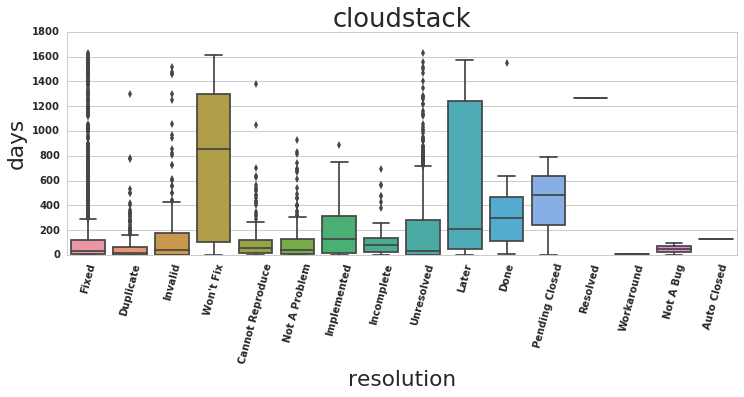

In [287]:
ax=sns.boxplot(y='days', x='resolution', data=issues_cloudstack).set_title('cloudstack')
plt.xticks(rotation='75')
ax.figure.set_size_inches(12,4)

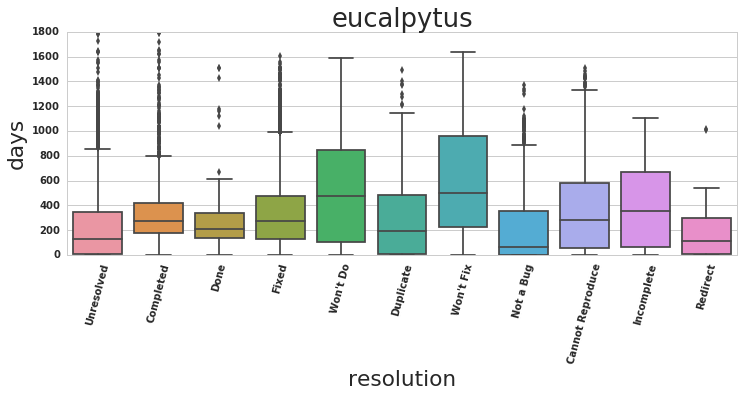

In [288]:
ax=sns.boxplot(y='days', x='resolution', data=issues_eucalpytus).set_title('eucalpytus')
plt.xticks(rotation='75')
ax.figure.set_size_inches(12,4)

In [45]:
issues_eucalpytus['date_creation']=issues_eucalpytus['created'].apply(lambda x: datetime.datetime.strptime(str(x).split('-')[0]+'-'+str(x).split
                                                                                                           ('-')[1]+'-01', "%Y-%m-%d"))
issues_cloudstack['date_creation']=issues_cloudstack['created'].apply(lambda x: datetime.datetime.strptime(str(x).split('-')[0]+'-'+str(x).split
                                                                                                           ('-')[1]+'-01', "%Y-%m-%d"))

# only bugs

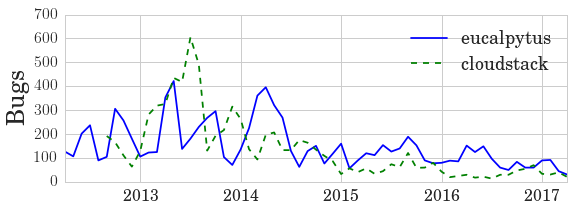

In [88]:
issues_eucalpytus['date_creation']=issues_eucalpytus['created'].apply(lambda x: datetime.datetime.strptime(str(x).split('-')[0]+'-'+str(x).split
                                                                                                           ('-')[1]+'-01', "%Y-%m-%d"))
issues_cloudstack['date_creation']=issues_cloudstack['created'].apply(lambda x: datetime.datetime.strptime(str(x).split('-')[0]+'-'+str(x).split
                                                                                                           ('-')[1]+'-01', "%Y-%m-%d"))

bugs_time=issues_eucalpytus[issues_eucalpytus.type=='Bug'].groupby('date_creation').count()
bugs_time['eucalpytus']=bugs_time['key']
ax=bugs_time.plot(y='eucalpytus', color='blue')#, ax=axes[int(i/2)][j], label=type)

bugs_time=issues_cloudstack[issues_cloudstack.type=='Bug'].groupby('date_creation').count()
bugs_time['cloudstack']=bugs_time['key']
ax=bugs_time.plot(y='cloudstack', linestyle="--", color='green', ax=ax)#, ax=axes[int(i/2)][j], label=type)    
#ax.set_ylim(0,10000)
ax.set_ylabel('Bugs')
ax.set_xlabel('')
ax.figure.set_size_inches(9,3)
plt.tick_params(axis='both', which='major', labelsize=16, width=6)
plt.legend(loc=1, prop={'size': 18})

ax.figure.savefig('./experiments/figures/bugs_time.pdf', bbox_inches='tight', facecolor='white')


# Test normal distribution

In [340]:

new_df=apache_cloudstack.dropna().developers_diff

#new_df=issues_cloudstack.query("type=='Bug'").dropna()['watches']

# Kolmogorov-Smirnov test: Fairly conservative
#test_result = scipy.stats.kstest(new_df, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats

# shapiro test
#test_result = scipy.stats.shapiro(new_df) 

# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
test_result = scipy.stats.normaltest(new_df) #nan_policy opts: 'propagate', 'raise'

# Anderson test: Modified KS, returns critical values for a list of significance levels
#test_result = scipy.stats.anderson(new_df, dist='norm')


test_result

NormaltestResult(statistic=494.42266286554877, pvalue=4.3399316996582505e-108)

# Homogenity test 

In [610]:
#new_cloud=apache_cloudstack.dropna().java_files
#new_euca=eucalyptus_eucalyptus.dropna().java_files
new_cloud=issues_cloudstack.query("type=='Bug'").dropna()['days']
new_euca=issues_eucalpytus.query("type=='Bug'").dropna()['days']

# Levene test: more robust than Bartlett if samples are non-normal. Can define what central tendency measure is used
#test_result = scipy.stats.levene(new_cloud, new_euca, center='trimmed') # For heavy-tailed distributions

# Fligner-Killeen's test: Non-parametric
#test_result = scipy.stats.fligner(new_cloud, new_euca, center='median') # For normal distributions
                                                                            # Use 'median' for skewed distributions
#test_result = scipy.stats.ttest_ind_from_stats(108, 205 ,7477,  319, 309, 9222, equal_var=False)
test_result = scipy.stats.ttest_ind(new_cloud, new_euca)

print(test_result)
#print(new_cloud.describe(),new_euca.describe())

Ttest_indResult(statistic=-50.58980344115573, pvalue=0.0)


In [606]:
f=open('bugs_days.csv','w')
# for bug in new_cloud:
#     f.write(''+str(bug)+'\n')
for bug in new_euca:
    f.write(''+str(bug)+'\n')
f.close()

# comparing two different samples: non parametric

In [373]:
new_cloud=issues_cloudstack.query("type=='Bug'").dropna()['days']
new_euca=issues_eucalpytus.query("type=='Bug'").dropna()['days']

# Mann-Whitney U test: More robust than Wilcoxon rank-sum, use if n > 20
test_result = scipy.stats.mannwhitneyu(new_cloud, new_euca, use_continuity=True, alternative='greater')
                                    # alternative options: 'less', 'two-sided'. 'None' is deprecated
# kolmogorov smirnov
#test_result =scipy.stats.ks_2samp(new_cloud,new_euca)
print(test_result)

MannwhitneyuResult(statistic=15215480.0, pvalue=nan)


C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


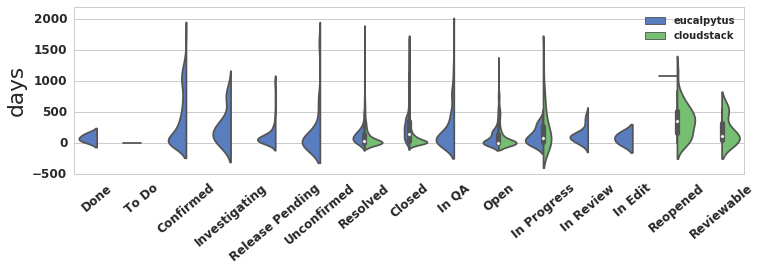

In [21]:
bugs_eucalpytus=issues_eucalpytus[issues_eucalpytus.type=='Bug']
bugs_cloudstack=issues_cloudstack[issues_cloudstack.type=='Bug']
bugs_cloudstack['project']='cloudstack'
bugs_eucalpytus['project']='eucalpytus'
df=pd.concat([bugs_eucalpytus,bugs_cloudstack])

ax1 = sns.violinplot(y="days", x="status", hue="project",data=df, palette="muted", split=True)
ax1.legend()
ax1.set_ylim(-500,2200)
plt.xticks(rotation='40')
plt.ylabel('days')
plt.xlabel('')
ax1.figure.set_size_inches(12, 3) 
plt.tick_params(axis='both', which='major', labelsize=12)

ax1.figure.savefig('./experiments/figures/days_bug_status.pdf', bbox_inches='tight', facecolor='white')




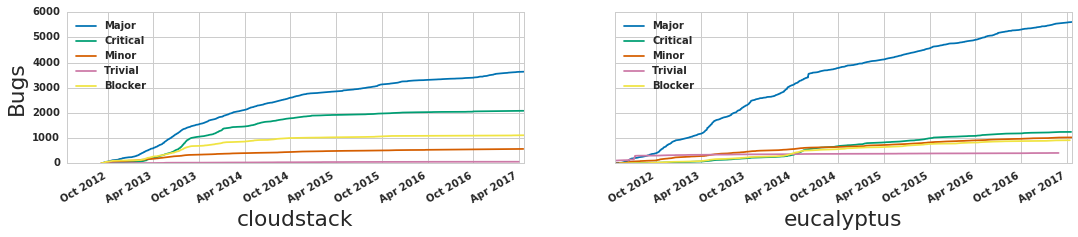

In [697]:
figure, axes = plt.subplots(1, 2, sharex=True, sharey=True)
types=bugs_time.priority.unique()
for j, (name,df) in enumerate(cloud_plats_issues):
    bugs_time=df[df.type=='Bug']
    for i,priority in enumerate(types):
        bugs_priority=bugs_time[bugs_time.priority==priority].groupby('created').count()
        bugs_priority['key']=bugs_priority['key'].cumsum()
        if i!=0:
            ax=bugs_priority.plot(y='key', alpha=1, label=priority,ax=ax)#, ax=axes[int(i/2)][j], label=type) 
            ax.set_ylim(0,6000)
            ax.set_xlabel(name)
            ax.figure.set_size_inches(18,3)
        else:
            ax=bugs_priority.plot(y='key', alpha=1,label=priority, ax=axes[j])#, ax=axes[int(i/2)][j], label=type)   
axes[0].set_ylabel('Bugs')
figure.savefig('./experiments/figures/bugs_priority_time.pdf', bbox_inches='tight', facecolor='white')


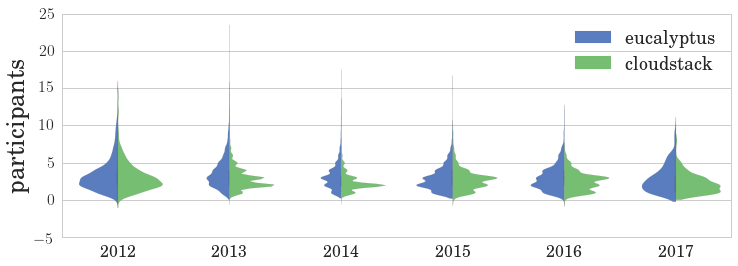

In [89]:
linestyles = ['_', '-', '--', ':']

issues_cloudstack['project']='cloudstack'
issues_eucalpytus['project']='eucalyptus'
df=pd.concat([issues_eucalpytus[issues_eucalpytus.type=='Bug'],issues_cloudstack[issues_cloudstack.type=='Bug']])
#df=pd.concat([issues_eucalpytus,issues_cloudstack])

df['date']= df['created'].apply(lambda x: str(x).split('-')[0])
df.head()
ax = sns.violinplot(x="date", y="watches", hue="project",data=df,linewidth=0.1, palette="muted", split=True)
ax.legend()
ax.set_ylabel('participants')
ax.set_xlabel('')
ax.figure.set_size_inches(12,4)
plt.legend(loc=1, prop={'size': 18})
plt.tick_params(axis='both', which='major', labelsize=16, width=6)
ax.figure.savefig('./experiments/figures/developpers_bugs.pdf', bbox_inches='tight', facecolor='white')

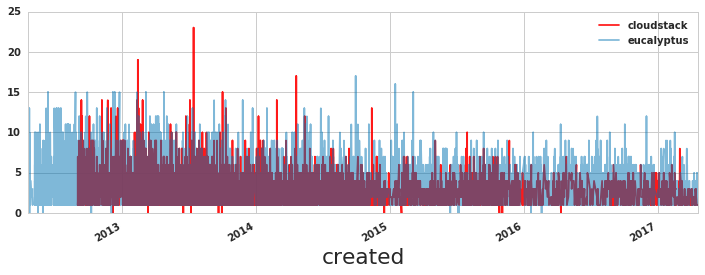

In [61]:
ax=issues_cloudstack.set_index('created').plot( y='watches', alpha=0.9, color='red', label='cloudstack')
ax=issues_eucalpytus.set_index('created').plot( y='watches',alpha=0.5, label='eucalyptus', ax=ax)
ax.figure.set_size_inches(12,4)

C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':
C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


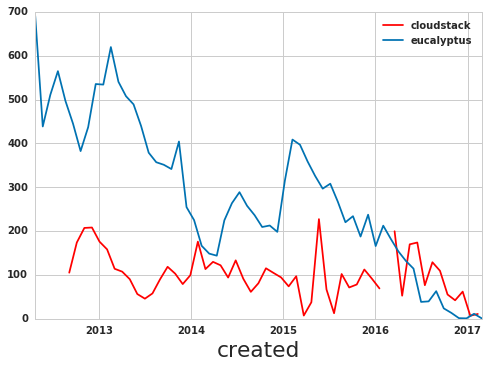

In [68]:
ax=issues_cloudstack[issues_cloudstack.type=='Bug'].query('status=="Closed"').set_index('created').resample('30D').plot( y='days', color='red', label='cloudstack')
issues_eucalpytus[issues_eucalpytus.type=='Bug'].query('status=="Closed"').set_index('created').resample('30D').plot( y='days', label='eucalyptus', ax=ax)

In [65]:
new_cloud=issues_cloudstack.query("type=='Bug'").dropna()
new_cloud['date']= new_cloud['created'].apply(lambda x: str(x).split('-')[0])

new_euca=issues_eucalpytus.query("type=='Bug'").dropna()
new_euca['date']= new_euca['created'].apply(lambda x: str(x).split('-')[0])

for year in range(2012,2018):
    c=new_cloud.query('date=="'+str(year)+'"')['watches']
    e=new_euca.query('date=="'+str(year)+'"')['watches']
    test_result = scipy.stats.mannwhitneyu(c, e, use_continuity=True, alternative='less')
    print(year,test_result)

(2012, MannwhitneyuResult(statistic=398926.0, pvalue=0.001655369279039756))
(2013, MannwhitneyuResult(statistic=3471426.5, pvalue=1.609089307877827e-67))
(2014, MannwhitneyuResult(statistic=1546440.5, pvalue=4.3525159285207097e-91))
(2015, MannwhitneyuResult(statistic=504777.5, pvalue=0.015918731658318128))
(2016, MannwhitneyuResult(statistic=188704.5, pvalue=3.9084265594183648e-06))
(2017, MannwhitneyuResult(statistic=12645.5, pvalue=0.00021737787186523256))


In [212]:
#statistical test
issues_cloudstack['project']='cloudstack'
issues_eucalpytus['project']='eucalyptus'
df=pd.concat([issues_eucalpytus[issues_eucalpytus.type=='Bug'],issues_cloudstack[issues_cloudstack.type=='Bug']])

df['date']= df['created'].apply(lambda x: str(x).split('-')[0])
for year in range(2012,2018):
    cloudstack_test=df.query('project == "cloudstack" and date=="'+str(year)+'"')
    eucalyptus_test=df.query('project == "eucalyptus" and date=="'+str(year)+'"')
    print(year,scipy.stats.ks_2samp(eucalyptus_test.watches,cloudstack_test.watches))

(2012, Ks_2sampResult(statistic=0.05964413242147304, pvalue=0.11160558858182316))
(2013, Ks_2sampResult(statistic=0.208020071073443, pvalue=1.1864375790064001e-56))
(2014, Ks_2sampResult(statistic=0.29859252282916399, pvalue=3.3798699741943081e-81))
(2015, Ks_2sampResult(statistic=0.083029892454907217, pvalue=0.0023225360678463896))
(2016, Ks_2sampResult(statistic=0.15746845746845739, pvalue=6.9850340955433324e-07))
(2017, Ks_2sampResult(statistic=0.1596530084902178, pvalue=0.023584907589713437))


# Life Cycle of issues and bugs

In [919]:
transitions=pd.read_csv('./experiments/transition_jira_eucalyptus.csv', sep=';', index_col=None)
issues=pd.read_csv('./experiments/issues_eucalyptus.csv', sep=';', index_col='key', parse_dates=['created'], 
                              usecols=['key','status','created','type'],infer_datetime_format="%Y-%m-%d")
f=open('./experiments/disco_bugs_eucalyptus.csv','w')
f.write('Case ID;Activity;Start Date;End Date\n')
for key in transitions.groupby('key').count().index:
    typee=issues.get_value(key,'type', takeable=False)
    if(typee!='Bug'):
        continue
    df=transitions[transitions.key==key]
    df=df.sort_values(["transition"], ascending=True)
    date=issues.get_value(key,'created', takeable=False)
    date_start=datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime('%d.%m.%y')
    for i,row in enumerate(df.iterrows()):
            frome=row[1][1]
            time_to_add=row[1][3].split('d')
            if(len(time_to_add)>1):
                time_to_add=int(time_to_add[0])
            else:
                time_to_add=0
            date = date + datetime.timedelta(days=time_to_add)
            date_end=datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime('%d.%m.%y')
            f.write(key+';'+frome+';'+str(date_start)+';'+str(date_end)+'\n')
            date_start=date_end
    to=issues.get_value(key,'status', takeable=False)
    f.write(key+';'+to+';'+str(date_start)+';25.04.17\n')
f.close()

# second
transitions=pd.read_csv('./experiments/transition_jira_cloudstack.csv', sep=';', index_col=None)
issues=pd.read_csv('./experiments/issues_cloudstack.csv', sep=';', index_col='key', parse_dates=['created'], 
                              usecols=['key','status','created','type'],infer_datetime_format="%Y-%m-%d")
f=open('./experiments/disco_bugs_cloudstack.csv','w')
f.write('Case ID;Activity;Start Date;End Date\n')
for key in transitions.groupby('key').count().index:
    typee=issues.get_value(key,'type', takeable=False)
    if(typee!='Bug'):
        continue
    df=transitions[transitions.key==key]
    df=df.sort_values(["transition"], ascending=True)
    date=issues.get_value(key,'created', takeable=False)
    date_start=datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime('%d.%m.%y')
    for i,row in enumerate(df.iterrows()):
            frome=row[1][1]
            time_to_add=row[1][3].split('d')
            if(len(time_to_add)>1):
                time_to_add=int(time_to_add[0])
            else:
                time_to_add=0
            date = date + datetime.timedelta(days=time_to_add)
            date_end=datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime('%d.%m.%y')
            f.write(key+';'+frome+';'+str(date_start)+';'+str(date_end)+'\n')
            date_start=date_end
    to=issues.get_value(key,'status', takeable=False)
    f.write(key+';'+to+';'+str(date_start)+';25.04.17\n')
f.close()

# Explore test coverage

In [65]:
apache_cloudstack_test=pd.read_csv('./experiments/cloudstack_test.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(apache_cloudstack_test):
    if p!='date':
        apache_cloudstack_test[p]= apache_cloudstack_test[p].apply(int)
        
eucalyptus_eucalyptus_test=pd.read_csv('./experiments/eucalyptus_test.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(eucalyptus_eucalyptus_test):
    if p!='date':
        eucalyptus_eucalyptus_test[p]= eucalyptus_eucalyptus_test[p].apply(int)
eucalyptus_eucalyptus_test.all_classes=eucalyptus_eucalyptus_test.all_classes - eucalyptus_eucalyptus_test.interfaces
apache_cloudstack_test.all_classes=apache_cloudstack_test.all_classes - apache_cloudstack_test.interfaces

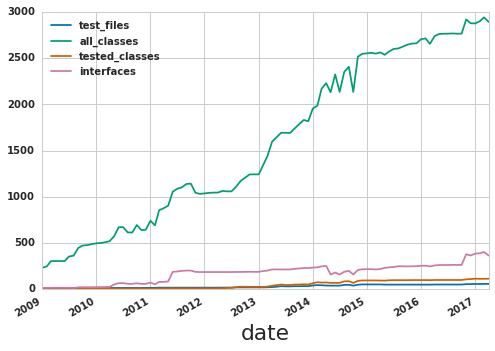

In [123]:
eucalyptus_eucalyptus_test.plot(x='date')

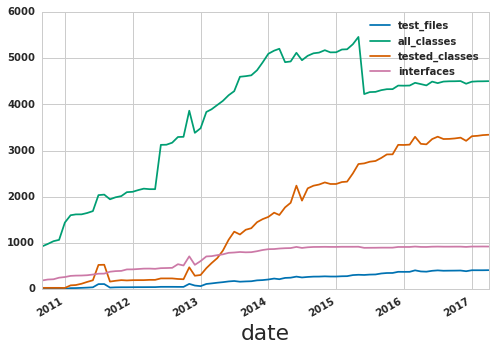

In [124]:
apache_cloudstack_test.plot(x='date')

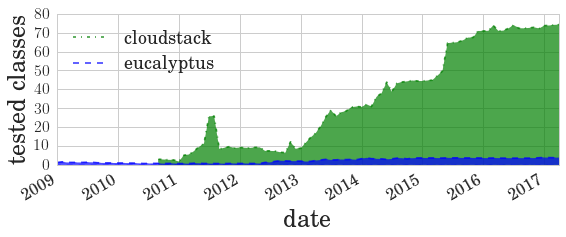

In [91]:
linestyles = ['_', '-', '--', ':']
apache_cloudstack_test['tested_prop']=apache_cloudstack_test.tested_classes*100/apache_cloudstack_test.all_classes
eucalyptus_eucalyptus_test['tested_prop']=eucalyptus_eucalyptus_test.tested_classes*100/eucalyptus_eucalyptus_test.all_classes
#figure, axes = plt.subplots(1, 2, sharex=True, sharey=True)
ax=apache_cloudstack_test.plot.area(x='date', y='tested_prop',  linestyle='-.', alpha=0.7, label='cloudstack', color='green')
eucalyptus_eucalyptus_test.plot.area(x='date', y='tested_prop',alpha=0.7,  linestyle='--',ax=ax, label='eucalyptus', color='blue')
ax.figure.set_size_inches(9,3)
ax.set_ylabel('tested classes %')
plt.legend(loc=2, prop={'size': 18})

plt.tick_params(axis='both', which='major', labelsize=16, width=6)
ax.figure.savefig('./experiments/figures/test_coverage.pdf', bbox_inches='tight', facecolor='white')


In [67]:
test_dev_cloud=pd.read_csv('./experiments/test_dev_cloud.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
test_dev_allCloud=pd.read_csv('./experiments/test_dev_allCloud.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
test_dev_cloud['developers']= test_dev_cloud['developers'].apply(int)
test_dev_cloud['date']= test_dev_cloud['date'].apply(lambda x: str(x).split('-')[0])

test_dev_allCloud['developers']= test_dev_allCloud['developers'].apply(int)
test_dev_allCloud['date']= test_dev_allCloud['date'].apply(lambda x: str(x).split('-')[0])
test_dev_allCloud['project']= test_dev_allCloud['project'].apply(lambda x: str(x).split('_')[1].split('.')[0])

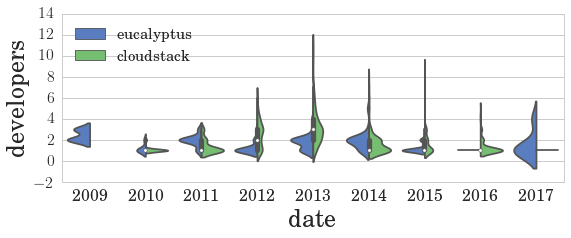

In [94]:
ax1 = sns.violinplot(y="developers", x="date", hue="project",data=test_dev_cloud, palette="muted", split=True)
ax1.legend()
ax1.figure.set_size_inches(9,3)
plt.legend(loc=2, prop={'size': 15})

plt.tick_params(axis='both', which='major', labelsize=16, width=6)
ax1.figure.savefig('./experiments/figures/developpers_test_files.pdf', bbox_inches='tight', facecolor='white')


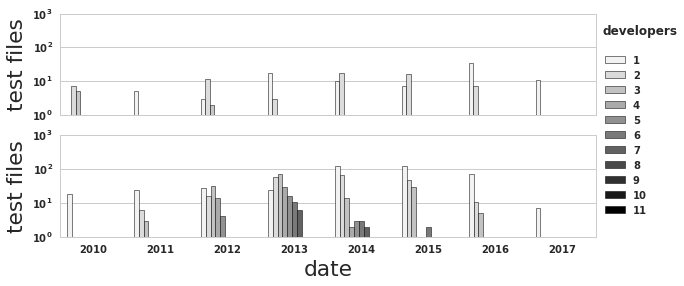

In [121]:


figure, axes = plt.subplots(2, 1, sharex=True, sharey=True)

dev_t= pd.read_csv('./experiments/developers_hist.csv', sep=';')
dev_t.set_index('files', inplace=True)
ax = sns.countplot( x="date", hue="developers", data=test_dev_cloud.query('project=="eucalyptus"'), 
                   hue_order=[1,2,3,4,5,6,7,8,9,10,11,12], color='black', edgecolor='black', ax=axes[0])

ax.legend('')
ax.set_xlabel('')
box = ax.get_position()

ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_ylabel('test files')
ax = sns.countplot( x="date", hue="developers", data=test_dev_cloud.query('project=="cloudstack"'), 
                   hue_order=[1,2,3,4,5,6,7,8,9,10,11], color='black', edgecolor='black')
ax.set_yscale('log')
ax.set_ylabel('test files')
ax.text(7.6, 1000000, r'developers', fontsize=12)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 1 ))
ax.figure.set_size_inches(12,4)

ax.figure.savefig('./experiments/figures/test_developers.pdf', bbox_inches='tight', facecolor='white')


In [120]:
test_dev_cloud.query('developers >10')

,project,file,date,developers
313,cloudstack,294a93a168bdc1f34640595aabe2355227f48e31,2013,11


In [34]:
for year in range(2009,2018):
    cloudstack_test=test_dev_cloud.query('project == "cloudstack" and date=="'+str(year)+'"')
    eucalyptus_test=test_dev_cloud.query('project == "eucalyptus" and date=="'+str(year)+'"')
    print(year,scipy.stats.ks_2samp(eucalyptus_test.developers,cloudstack_test.developers))

(2009, Ks_2sampResult(statistic=nan, pvalue=nan))
(2010, Ks_2sampResult(statistic=0.11403508771929816, pvalue=0.99999982738002247))
(2011, Ks_2sampResult(statistic=0.55080213903743314, pvalue=0.0011706275678890258))
(2012, Ks_2sampResult(statistic=0.51165146909827763, pvalue=0.00013088840424623659))
(2013, Ks_2sampResult(statistic=0.55660525901432845, pvalue=1.0431007437139761e-07))
(2014, Ks_2sampResult(statistic=0.2953424657534246, pvalue=0.031378133120564228))
(2015, Ks_2sampResult(statistic=0.22639747928579756, pvalue=0.050331527801667532))
(2016, Ks_2sampResult(statistic=0.19318181818181823, pvalue=0.81625802474670095))
(2017, Ks_2sampResult(statistic=0.16666666666666663, pvalue=0.99991003776850174))


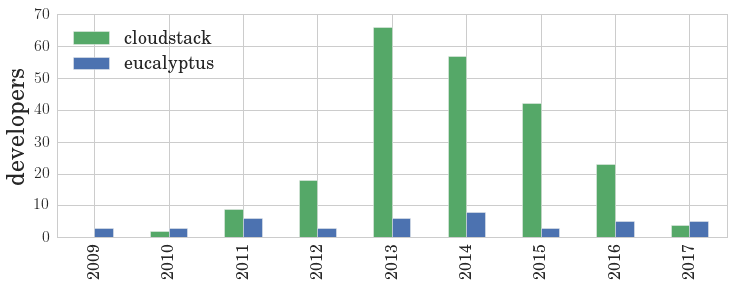

In [95]:
#test_dev_allCloud=test_dev_allCloud.set_index('developpers')
tDev_cloud=test_dev_allCloud.set_index('date')
tDev_cloud = pd.concat([tDev_cloud.query("project == 'cloudstack'"), tDev_cloud.query("project == 'eucalyptus'")], axis=1)
tDev_cloud.columns=['project1','cloudstack','project2','eucalyptus']
tDev_cloud=tDev_cloud.drop(['project1','project2'], axis=1)

ax=tDev_cloud.plot(kind='bar', colors=['g','b'])
ax.figure.set_size_inches(12,4)
plt.tick_params(axis='both', which='major', labelsize=16, width=6)
plt.legend(loc=2, prop={'size': 18})

ax.set_ylabel('developers')
ax.figure.savefig('./experiments/figures/test_developers.pdf', bbox_inches='tight', facecolor='white')


In [77]:
#new_cloud=issues_cloudstack.query("type=='Bug'").dropna()['days']
#new_euca=issues_eucalpytus.query("type=='Bug'").dropna()['days']

new_cloud=issues_cloudstack.dropna().query('type=="New Feature"')['days']
new_euca=issues_eucalpytus.dropna().query('type=="New Feature"')['days']
new_cloud=new_cloud[0:1290]
new_euca=new_euca[0:1290]
#Mann-Whitney U test: More robust than Wilcoxon rank-sum, use if n > 20
test_result2 = scipy.stats.mannwhitneyu(new_cloud, new_euca, use_continuity=True, alternative='less')
                                    # alternative options: 'greater', less', 'two-sided'. 'None' is deprecated
# kolmogorov smirnov
#test_result =scipy.stats.ks_2samp(new_cloud,new_euca)

#paired data
#test_result = scipy.stats.wilcoxon(new_cloud, new_euca, zero_method='wilcox', correction=False)

#print("kolmogorov",test_result)
print("Mann-Whitney",test_result2)

('Mann-Whitney', MannwhitneyuResult(statistic=103812.0, pvalue=0.59819003333799825))


In [78]:
len(issues_cloudstack.dropna().query('type=="Bug"'))

7477

In [79]:
len(issues_eucalpytus.dropna().query('type=="Bug"'))

9222

In [85]:
print(len(issues_cloudstack)/7477, len(issues_eucalpytus)/9222)

(1, 1)
